# Name: Nikhilesh Upadhyay


# Task: Prediction using Supervised ML

# Spark Foundation

# Predict the Percentage of a Student on the number of Study hours

In [1]:
# Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [5]:
url = 'https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv'
df = pd.read_csv(url)
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [7]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


# Distribution Plot

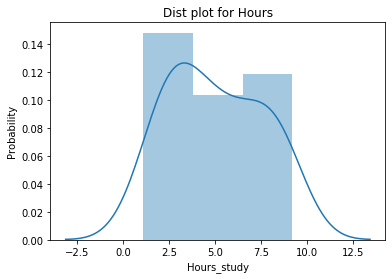

In [8]:
sns.distplot(df['Hours'])
plt.xlabel('Hours_study')
plt.ylabel('Probability')
plt.title('Dist plot for Hours')
plt.show()

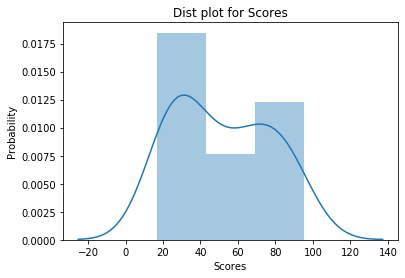

In [9]:
sns.distplot(df['Scores'])
plt.xlabel('Scores')
plt.ylabel('Probability')
plt.title('Dist plot for Scores')
plt.show()

# Bivariate Analysis

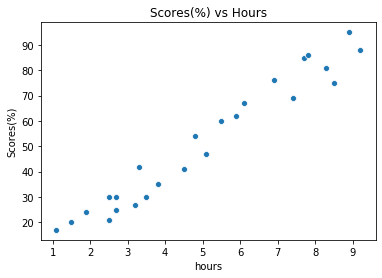

In [10]:
sns.scatterplot(x=df['Hours'], y=df['Scores'])
plt.xlabel('hours')
plt.ylabel('Scores(%)')
plt.title('Scores(%) vs Hours')
plt.show()

# multivariate Analysis

<function matplotlib.pyplot.show(*args, **kw)>

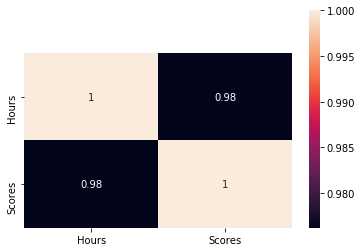

In [11]:
ax= sns.heatmap(df.corr(),annot=True)
bottom,top=ax.get_ylim()
ax.set_ylim(bottom+0,top-0.5)
plt.show

# data for modeling

In [12]:
x=df[['Hours']]
y=df[['Scores']]

In [13]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=0)

In [14]:
xtrain.shape,xtest.shape

((20, 1), (5, 1))

# using linear regression for building the model and prediction

In [18]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression(fit_intercept=True)

# Fitting the model

In [19]:
lr.fit(xtrain,ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [20]:
#Linear Regression intercept
lr.intercept_

array([2.01816004])

In [21]:
#Linear Regression Coefficient of hours
lr.coef_

array([[9.91065648]])

Equation will be:
Scores = intercept + coefficient*(Hours)
scores = 2.01816004 + 9.91065648*(Hours)

# Plotting the regression line

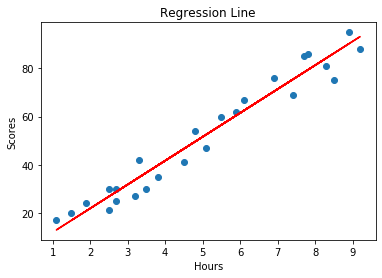

In [22]:
plt.scatter(x,y)
plt.plot(x,lr.predict(x),color='red')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.title('Regression Line')
plt.show()

# Predicting the xtest

In [23]:
y_pred = lr.predict(xtest)
print(y_pred)

[[16.88414476]
 [33.73226078]
 [75.357018  ]
 [26.79480124]
 [60.49103328]]


In [24]:
y_pred=y_pred.flatten()

In [25]:
data = pd.DataFrame({'Actual':ytest.values.flatten(),'Prediction':y_pred})

In [26]:
print(data)

   Actual  Prediction
0      20   16.884145
1      27   33.732261
2      69   75.357018
3      30   26.794801
4      62   60.491033


In [27]:
lr.score(xtest,ytest)

0.9454906892105356

# Testing for new data

In [29]:
hours = np.array(9.25).reshape(1,-1)
result = lr.predict(hours)
print('No. of hours:',np.asscalar(hours))
print('Predicted score(%):',np.asscalar(result))

No. of hours: 9.25
Predicted score(%): 93.69173248737538


C:\Users\Nikhilesh Upadhyay\anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Nikhilesh Upadhyay\anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  after removing the cwd from sys.path.


# Evaluating the model

In [32]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [33]:
RMSE = mean_squared_error(ytest,y_pred,squared=False)

In [35]:
print('The RMSE is:',RMSE)

The RMSE is: 4.6474476121003665


In [36]:
MSE = mean_squared_error(ytest,y_pred)

In [37]:
print('The MSE is:',MSE)

The MSE is: 21.5987693072174


In [38]:
MAE = mean_absolute_error(ytest,y_pred)

In [39]:
print('The MAE is:',MAE)

The MAE is: 4.183859899002975
